<a href="https://colab.research.google.com/github/ruoroj/ProjectWeekPractice/blob/main/multi_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb

import wandb

In [ ]:
# Load the libraries needed 
!pip install tensorflow-gpu==2.0.0
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

In [ ]:
df = pd.read_csv('/content/train (1).csv')
df.head(5)

,Unnamed: 0,tweet,disorder,word_count,char_count,unique_word_count,clean_tweet,clean_tweet_tok
0,0,SHOCK as a young man climbs on top of a hospit...,4,23,140,22,shock young man climb top hospital building ka...,"['shock', 'young', 'man', 'climb', 'top', 'hos..."
1,1,People tend to hide depression under drinking ...,4,19,102,17,people tend hide depression drinking drug take...,"['people', 'tend', 'hide', 'depression', 'drin..."
2,2,@Lily_nganga Depression,4,2,23,2,lily nganga depression,"['lily', 'nganga', 'depression']"
3,3,Itumbi has subjected bloggers in to depression...,4,15,120,14,itumbi subject blogger depression ought behind...,"['itumbi', 'subject', 'blogger', 'depression',..."
4,4,Mental health isn’t just anxiety &amp; depress...,4,19,144,19,mental health isnt anxiety amp depression nag ...,"['mental', 'health', 'isnt', 'anxiety', 'amp',..."


In [ ]:
df.columns

Index(['Unnamed: 0', 'tweet', 'disorder', 'word_count', 'char_count',
       'unique_word_count', 'clean_tweet', 'clean_tweet_tok'],
      dtype='object')

In [ ]:
df.drop(['Unnamed: 0','tweet','word_count', 'char_count','unique_word_count','clean_tweet_tok'],axis=1,inplace=True)

In [ ]:
df.head(1)

,disorder,clean_tweet
0,4,shock young man climb top hospital building ka...


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df['clean_tweet']
y = df['disorder']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')

In [ ]:
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

## naive_bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf,y_train)

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [ ]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfidf,y_test)

NB MODEL
              precision    recall  f1-score   support

           0       0.76      0.57      0.65        46
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2
           4       0.60      0.94      0.73        63
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         9

    accuracy                           0.64       132
   macro avg       0.17      0.19      0.17       132
weighted avg       0.55      0.64      0.58       132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


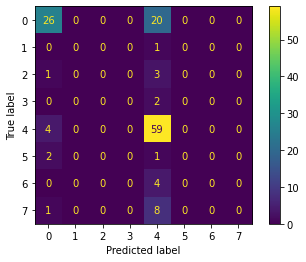

In [ ]:
print("NB MODEL")
report(nb)

## Logistic Regression

Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.74      0.77        46
           1       0.00      0.00      0.00         1
           2       1.00      0.25      0.40         4
           3       0.00      0.00      0.00         2
           4       0.69      0.92      0.79        63
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         4
           7       1.00      0.56      0.71         9

    accuracy                           0.74       132
   macro avg       0.44      0.31      0.33       132
weighted avg       0.71      0.74      0.71       132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


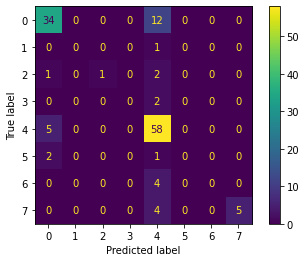

In [ ]:
print("Logistic Regression")
report(log)

## SVC

SVC
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        46
           1       0.00      0.00      0.00         1
           2       1.00      0.75      0.86         4
           3       1.00      0.50      0.67         2
           4       0.78      0.89      0.83        63
           5       1.00      0.33      0.50         3
           6       1.00      0.75      0.86         4
           7       1.00      0.78      0.88         9

    accuracy                           0.80       132
   macro avg       0.82      0.60      0.67       132
weighted avg       0.82      0.80      0.80       132



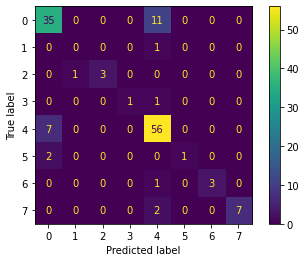

In [ ]:
print('SVC')
report(svc)